# Weather Prediction by Arun S John

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import pickle
import warnings

# Ignoring Warnings

In [ ]:
warnings.filterwarnings('ignore')

# Reading csv file to dataframe

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/weather1.csv')
df

,Unnamed: 0,Formatted Date,Summary,Classification,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13
1,1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63
2,2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94
3,3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41
4,4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51
...,...,...,...,...,...,...,...,...,...,...,...,...
95931,95931,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36
95932,95932,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16
95933,95933,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66
95934,95934,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95


In [ ]:
df['Loud Cover'].value_counts()

0    95936
Name: Loud Cover, dtype: int64

# Dropping unnecessary columns

In [ ]:
df.drop(['Unnamed: 0','Formatted Date','Loud Cover'],axis=1,inplace=True)

df

,Summary,Classification,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
95931,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36
95932,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16
95933,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66
95934,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,1015.95


# Checking for missing values

In [ ]:
df.isna().sum()

Summary                     0
Classification              0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

# Exploratory Data Analysis

**Countplot**

<Axes: title={'center': 'Count plot of classification of weather by summary'}, xlabel='Summary', ylabel='count'>

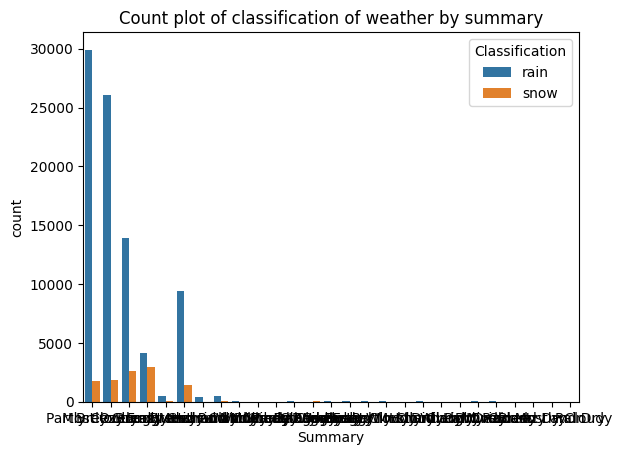

In [ ]:
plt.title("Count plot of classification of weather by summary")
sns.countplot(x='Summary',data=df,hue='Classification',legend='brief')

Insight: There is more chance of rain than snow

**Pairplot**

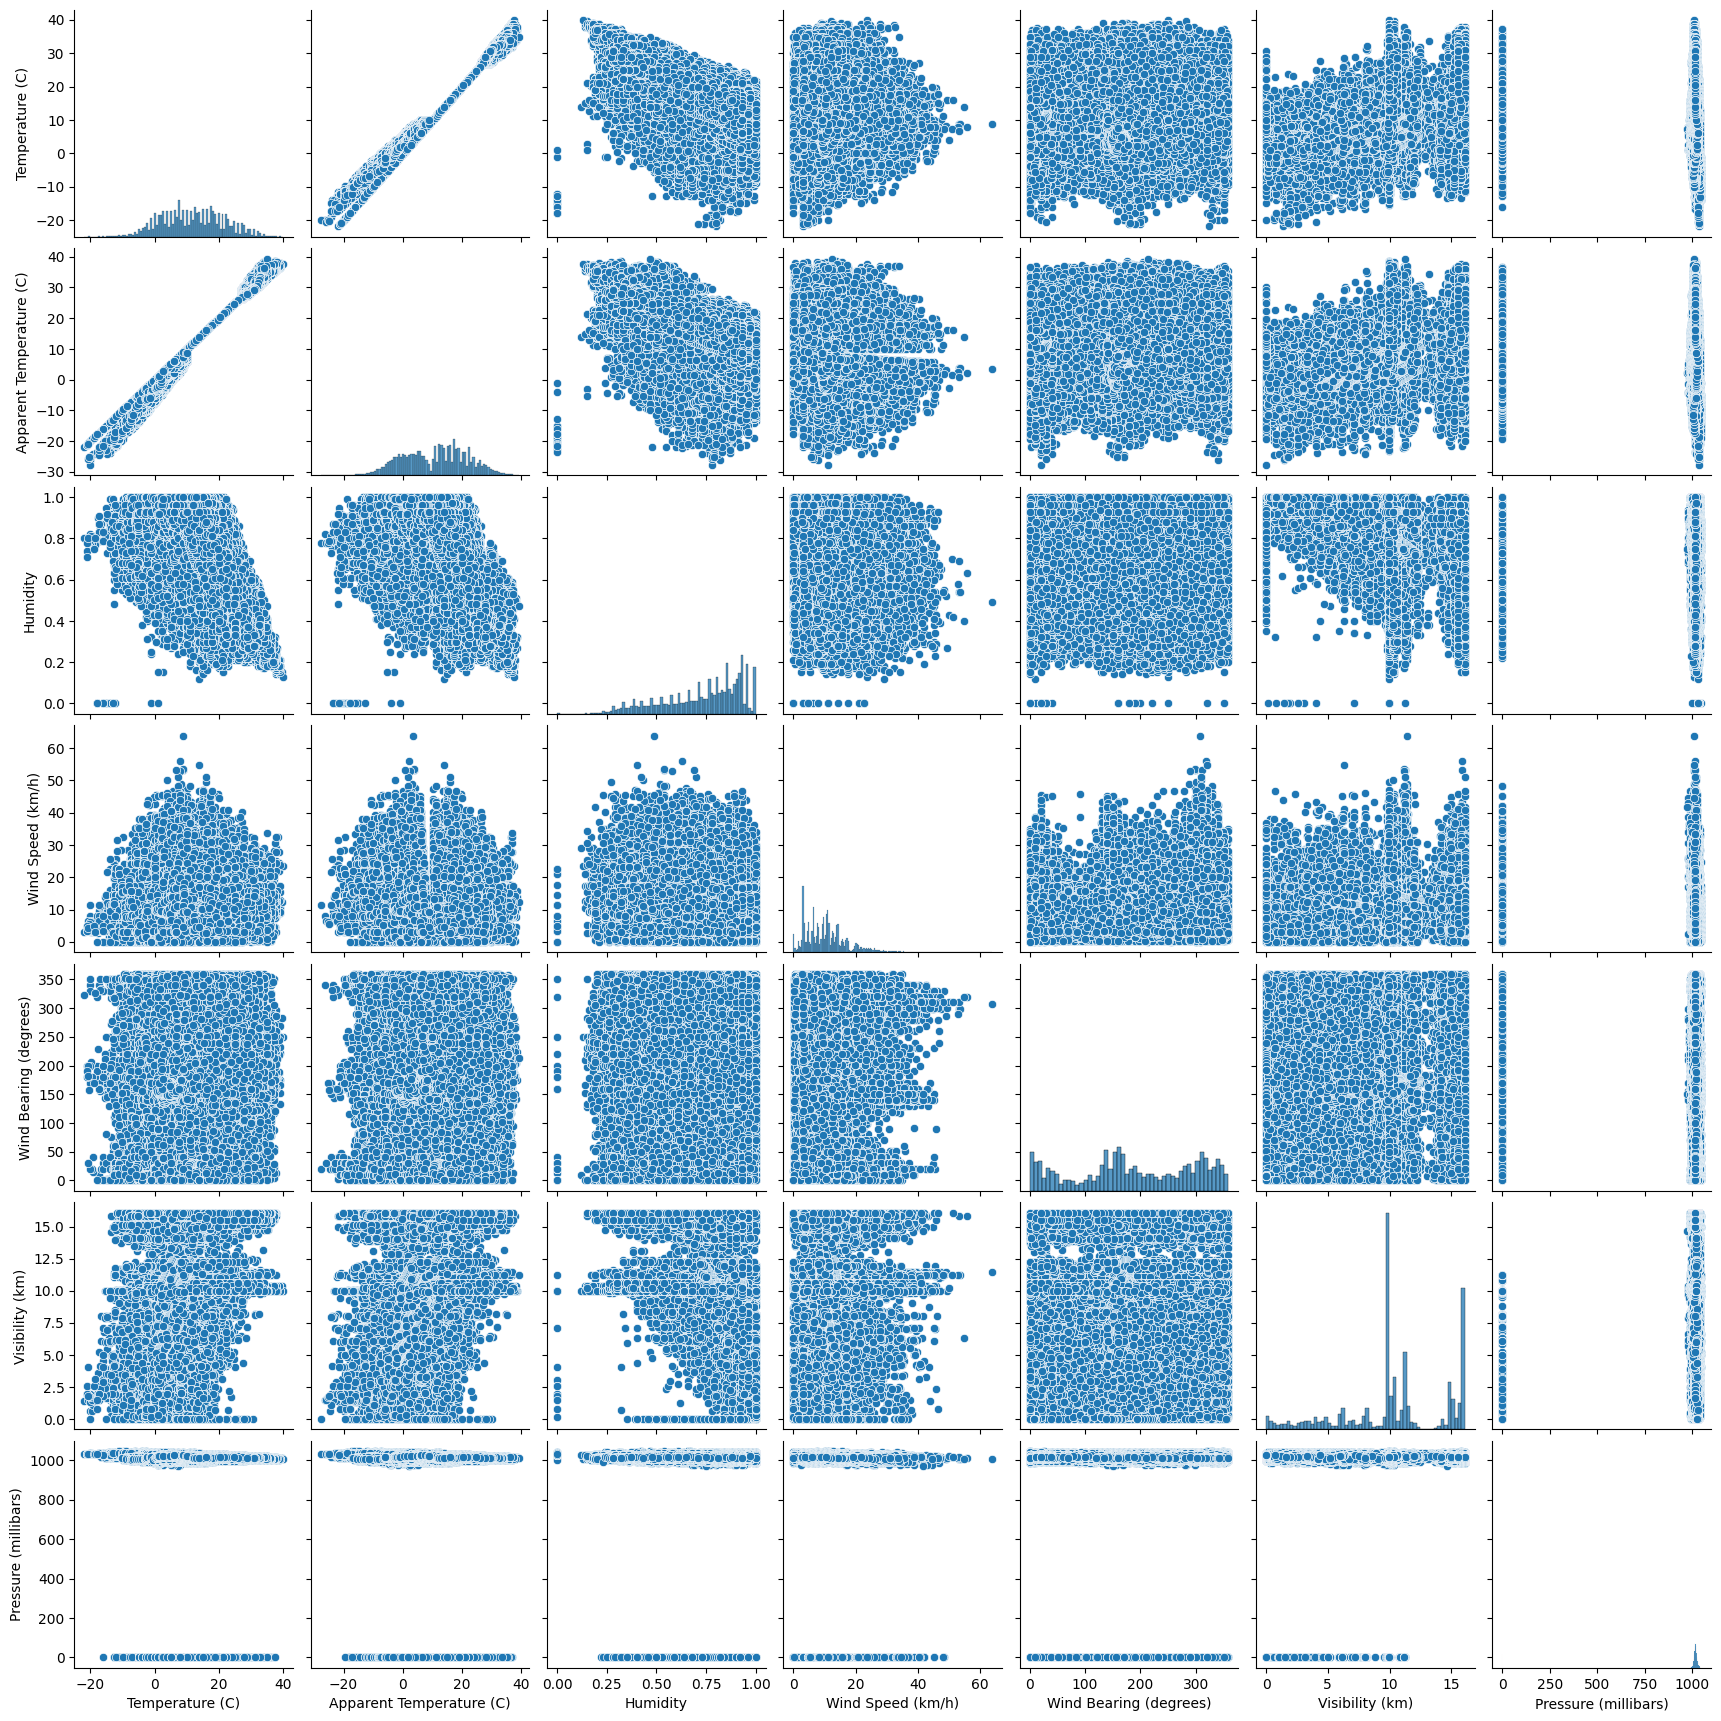

In [ ]:
sns.pairplot(df)

**Boxplot**

<Axes: title={'center': 'Boxplot of weather status'}, xlabel='Classification', ylabel='Temperature (C)'>

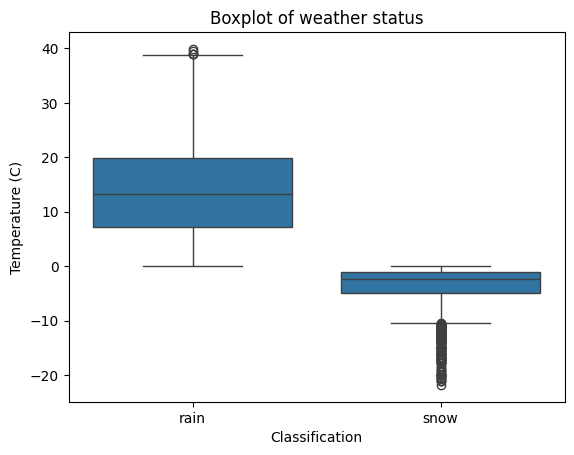

In [ ]:
plt.title('Boxplot of weather status')
sns.boxplot(x='Classification', y='Temperature (C)', data=df)

Insight:outliers are present

# Converting object datatype values to numeric values

In [ ]:
le=LabelEncoder()
df['Summary']=le.fit_transform(df['Summary'])
le1 = LabelEncoder()
df['Classification']=le1.fit_transform(df['Classification'])
df

,Summary,Classification,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,19,0,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,19,0,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,17,0,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,19,0,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,17,0,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
95931,19,0,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36
95932,19,0,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16
95933,19,0,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66
95934,19,0,21.522222,21.522222,0.60,10.5294,20,16.1000,1015.95


**Heatmap**

<Axes: >

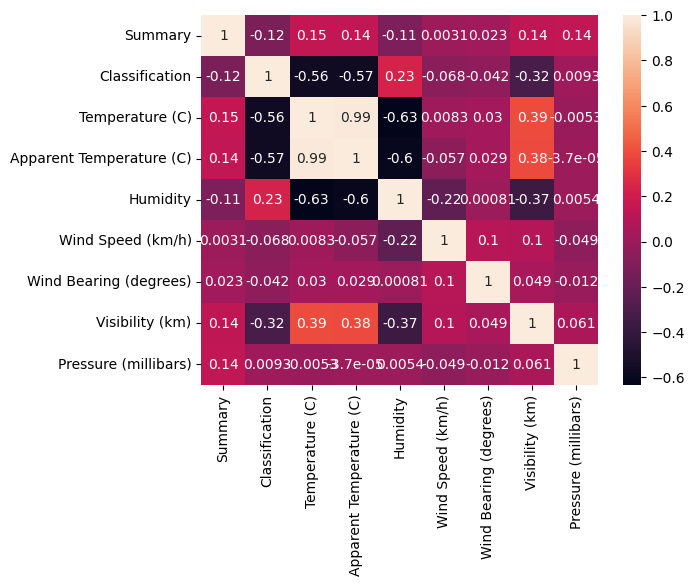

In [ ]:
sns.heatmap(df.corr(),annot=True)

# Splitting input and output variables

In [ ]:
x=df.drop(['Classification'],axis=1)
x

,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,19,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,19,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,17,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,19,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,17,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51
...,...,...,...,...,...,...,...,...
95931,19,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36
95932,19,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16
95933,19,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66
95934,19,21.522222,21.522222,0.60,10.5294,20,16.1000,1015.95


In [ ]:
y=df['Classification']
y

0        0
1        0
2        0
3        0
4        0
        ..
95931    0
95932    0
95933    0
95934    0
95935    0
Name: Classification, Length: 95936, dtype: int64

In [ ]:
y.value_counts()

0    85224
1    10712
Name: Classification, dtype: int64

# Scaling the input variables to a same range

In [ ]:
scaler=MinMaxScaler()
x_new=scaler.fit_transform(x)
x_new

array([[0.73076923, 0.50697507, 0.52348604, ..., 0.69916435, 0.983     ,
        0.97013513],
       [0.73076923, 0.50508505, 0.52108359, ..., 0.72144847, 0.983     ,
        0.97061297],
       [0.65384615, 0.50544505, 0.5531439 , ..., 0.56824513, 0.929     ,
        0.97090923],
       ...,
       [0.73076923, 0.71055711, 0.7419435 , ..., 0.08356546, 1.        ,
        0.97064164],
       [0.73076923, 0.70218702, 0.73423909, ..., 0.05571031, 1.        ,
        0.97091879],
       [0.73076923, 0.68463685, 0.71808467, ..., 0.1086351 , 0.964     ,
        0.97111948]])

# Splitting the dataset into train and test datas

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.3,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((67155, 8), (28781, 8), (67155,), (28781,))

# Performing classification algorithms

**KNeighbors Classifier**

Accuracy= 98.27316632500607
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     25549
           1       0.93      0.91      0.92      3232

    accuracy                           0.98     28781
   macro avg       0.96      0.95      0.96     28781
weighted avg       0.98      0.98      0.98     28781

ROC-AUC Score 95.25715594941036


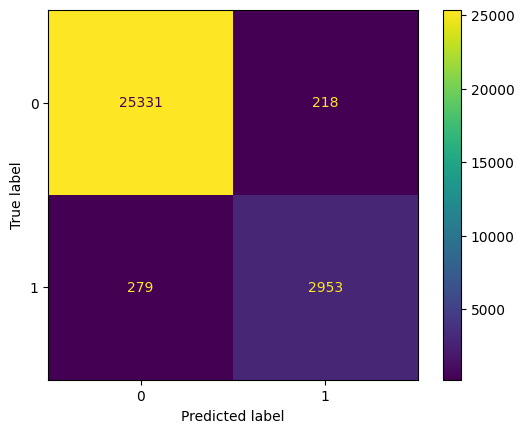

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
print("Accuracy=", accuracy_score(y_test,y_pred_knn)*100)
print(classification_report(y_test,y_pred_knn))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn))
print("ROC-AUC Score", roc_auc_score(y_test,y_pred_knn)*100)

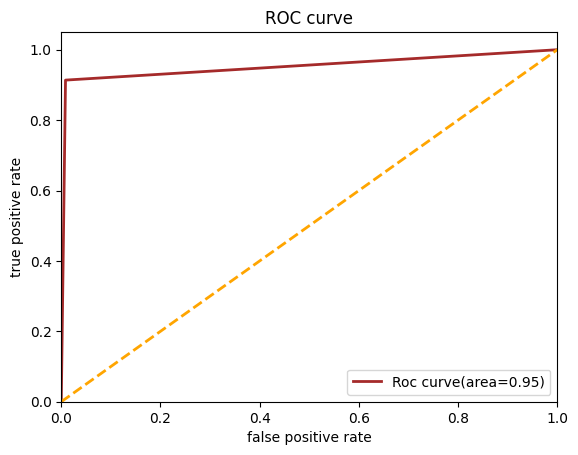

In [ ]:
fpr_knn,tpr_knn,treshold=roc_curve(y_test,y_pred_knn)
auc_knn=auc(fpr_knn,tpr_knn)
plt.figure()
lw=2
plt.plot(fpr_knn,tpr_knn,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_knn)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**SVC**

Accuracy= 99.1174733331017
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     25549
           1       0.95      0.97      0.96      3232

    accuracy                           0.99     28781
   macro avg       0.97      0.98      0.98     28781
weighted avg       0.99      0.99      0.99     28781

ROC-AUC Score 98.13807536498494


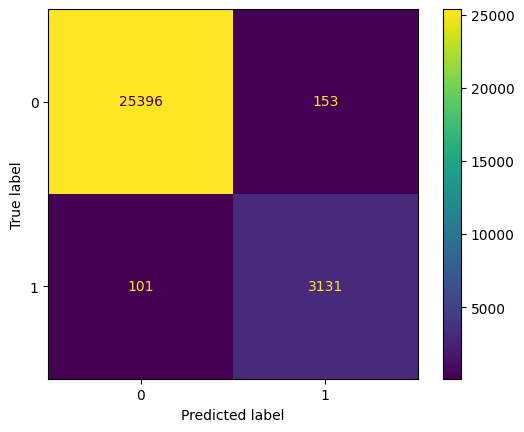

In [ ]:
sv=SVC(kernel='rbf')
sv.fit(x_train,y_train)
y_pred_sv=sv.predict(x_test)
print("Accuracy=", accuracy_score(y_test,y_pred_sv)*100)
print(classification_report(y_test,y_pred_sv))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sv))
print("ROC-AUC Score", roc_auc_score(y_test,y_pred_sv)*100)

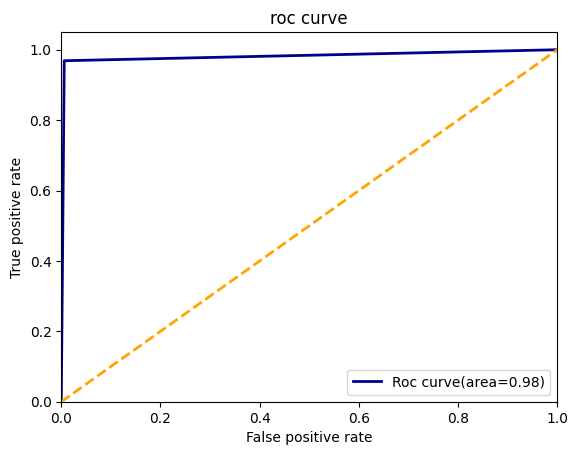

In [ ]:
fpr_sv,tpr_sv,treshold=roc_curve(y_test,y_pred_sv)
auc_sv=auc(fpr_sv,tpr_sv)
plt.figure()
lw=2
plt.plot(fpr_sv,tpr_sv,color='darkblue',lw=lw,label='Roc curve(area=%0.2f)' %auc_sv)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('roc curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

**Gaussian Naive Bayes**

Accuracy= 94.16281574649943
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     25549
           1       0.67      0.97      0.79      3232

    accuracy                           0.94     28781
   macro avg       0.83      0.95      0.88     28781
weighted avg       0.96      0.94      0.95     28781

ROC-AUC Score 95.21222675297982


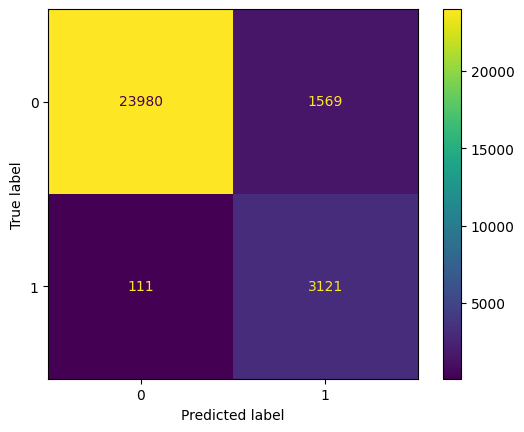

In [ ]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb=gnb.predict(x_test)
print("Accuracy=", accuracy_score(y_test,y_pred_gnb)*100)
print(classification_report(y_test,y_pred_gnb))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_gnb))
print("ROC-AUC Score", roc_auc_score(y_test,y_pred_gnb)*100)

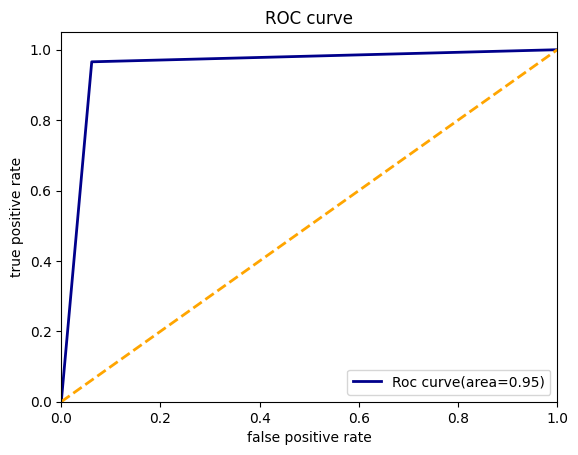

In [ ]:
fpr_gnb,tpr_gnb,treshold=roc_curve(y_test,y_pred_gnb)
auc_gnb=auc(fpr_gnb,tpr_gnb)
plt.figure()
plt.plot(fpr_gnb,tpr_gnb,color='darkblue',lw=2,label='Roc curve(area=%0.2f)'%auc_gnb)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**Decision Tree Classifier**

Accuracy= 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25549
           1       1.00      1.00      1.00      3232

    accuracy                           1.00     28781
   macro avg       1.00      1.00      1.00     28781
weighted avg       1.00      1.00      1.00     28781

ROC-AUC Score 100.0


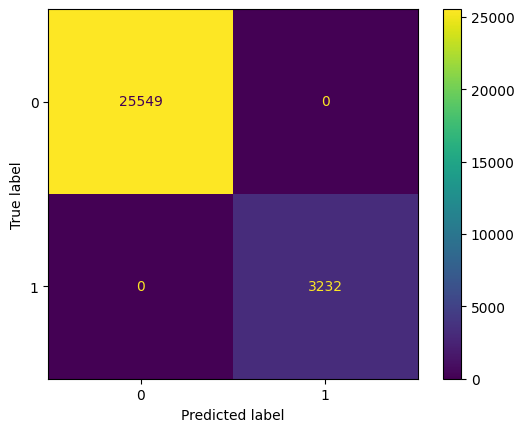

In [ ]:
dtc=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=4)
dtc.fit(x_train,y_train)
y_pred_dtc=dtc.predict(x_test)
print("Accuracy=", accuracy_score(y_test,y_pred_dtc)*100)
print(classification_report(y_test,y_pred_dtc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dtc))
print("ROC-AUC Score", roc_auc_score(y_test,y_pred_dtc)*100)

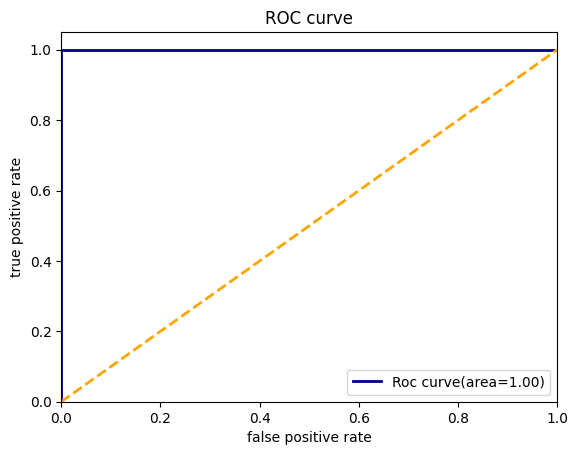

In [ ]:
fpr_dtc,tpr_dtc,treshold=roc_curve(y_test,y_pred_dtc)
auc_dtc=auc(fpr_dtc,tpr_dtc)
plt.figure()
plt.plot(fpr_dtc,tpr_dtc,color='darkblue',lw=2,label='Roc curve(area=%.2f)'%auc_dtc)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**Random Forest Classifier**

Accuracy= 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25549
           1       1.00      1.00      1.00      3232

    accuracy                           1.00     28781
   macro avg       1.00      1.00      1.00     28781
weighted avg       1.00      1.00      1.00     28781

ROC-AUC Score 100.0


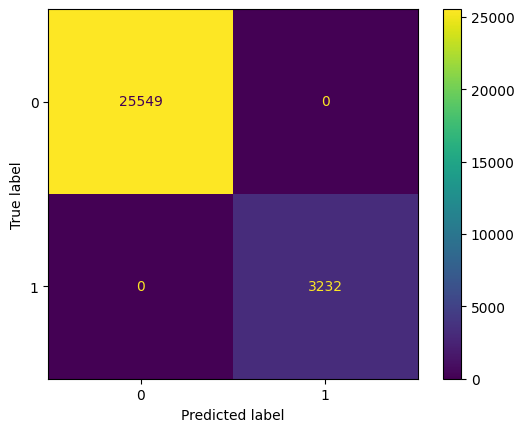

In [ ]:
rfc=RandomForestClassifier(n_estimators=200,random_state=1,criterion='entropy',max_depth=4)
rfc.fit(x_train,y_train)
y_pred_rfc=rfc.predict(x_test)
print("Accuracy=", accuracy_score(y_test,y_pred_rfc)*100)
print(classification_report(y_test,y_pred_rfc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rfc))
print("ROC-AUC Score", roc_auc_score(y_test,y_pred_rfc)*100)

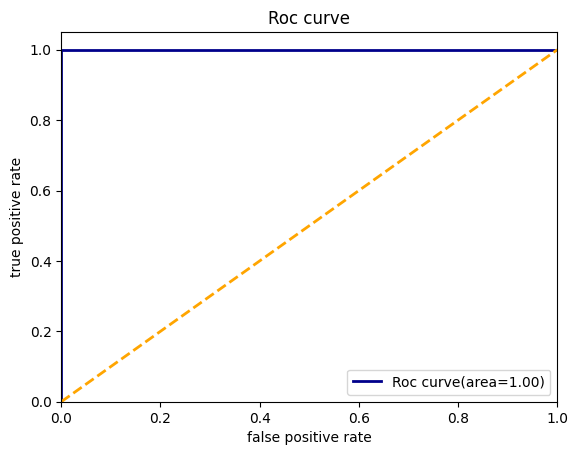

In [ ]:
fpr_rfc,tpr_rfc,treshold=roc_curve(y_test,y_pred_rfc)
auc_rfc=auc(fpr_rfc,tpr_rfc)
plt.figure()
plt.plot(fpr_rfc,tpr_rfc,color='darkblue',lw=2,label='Roc curve(area=%.2f)'%auc_rfc)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('Roc curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**AdaBoost Classifier**

Accuracy= 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25549
           1       1.00      1.00      1.00      3232

    accuracy                           1.00     28781
   macro avg       1.00      1.00      1.00     28781
weighted avg       1.00      1.00      1.00     28781

ROC-AUC Score 100.0


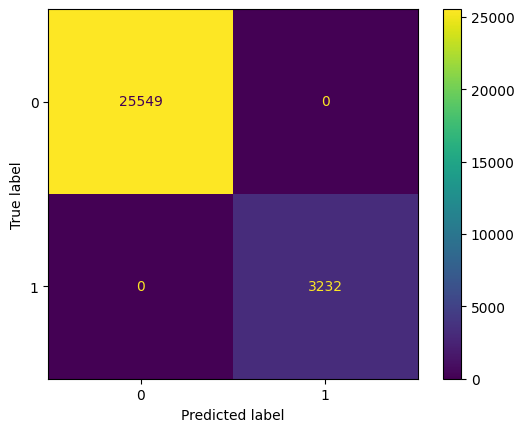

In [ ]:
ad=AdaBoostClassifier(n_estimators=200,random_state=1)
ad.fit(x_train,y_train)
y_pred_ad=ad.predict(x_test)
print("Accuracy=", accuracy_score(y_test,y_pred_ad)*100)
print(classification_report(y_test,y_pred_ad))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_ad))
print("ROC-AUC Score", roc_auc_score(y_test,y_pred_ad)*100)

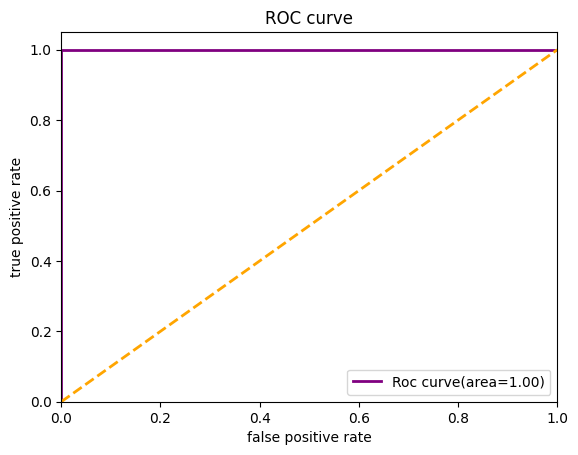

In [ ]:
fpr_ad,tpr_ad,treshold=roc_curve(y_test,y_pred_ad)
auc_ad=auc(fpr_ad,tpr_ad)
plt.figure()
plt.plot(fpr_ad,tpr_ad,color='purple',lw=2,label='Roc curve(area=%.2f)'%auc_ad)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**XGBoost Classifier**

Accuracy= 99.84712136478927
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25549
           1       0.99      1.00      0.99      3232

    accuracy                           1.00     28781
   macro avg       1.00      1.00      1.00     28781
weighted avg       1.00      1.00      1.00     28781

ROC-AUC Score 99.71119185556468


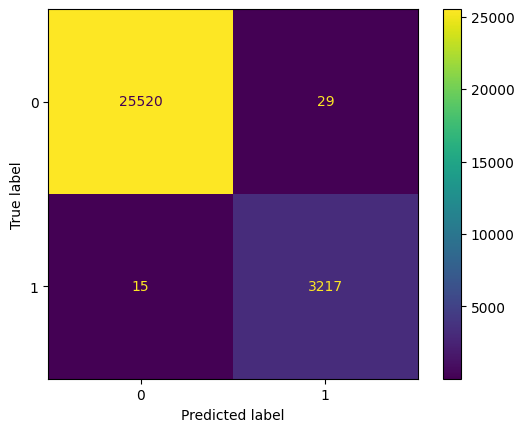

In [ ]:
xgb=XGBClassifier(n_estimators=200,random_state=1)
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)
print("Accuracy=", accuracy_score(y_test,y_pred_xgb)*100)
print(classification_report(y_test,y_pred_xgb))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_xgb))
print("ROC-AUC Score", roc_auc_score(y_test,y_pred_xgb)*100)

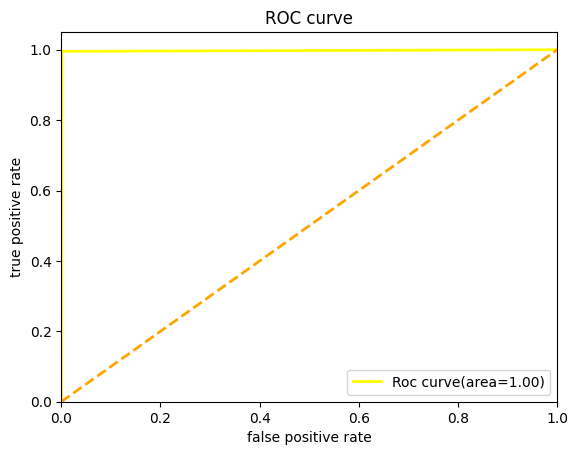

In [ ]:
fpr_xgb,tpr_xgb,treshold=roc_curve(y_test,y_pred_xgb)
auc_xgb=auc(fpr_xgb,tpr_xgb)
plt.figure()
plt.plot(fpr_xgb,tpr_xgb,color='yellow',lw=2,label='Roc curve(area=%.2f)'%auc_xgb)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Three classification models have 100% accuracy
# They are Random forest, Decision Tree and Adaboost classifiers
# so here we take decision tree classifier
# with random_state=1,criterion='entropy',max_depth=4

# Saving the model of Decision Tree Classifier model and its scaler

In [ ]:
pickle.dump(dtc,open('model_weather.sav','wb'))
pickle.dump(scaler,open('scaler_weather.sav','wb'))